In [1]:
import pandas as pd
import numpy as np
import datetime
from sklearn.metrics import mean_squared_error

import matplotlib
import matplotlib.image as img
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams.update({'font.size': 10})
matplotlib.rcParams.update({'figure.figsize': (12,6)})
matplotlib.rcParams["axes.grid"] = True

In [2]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import warnings
warnings.filterwarnings('ignore')

In [3]:
Path_Energy = 'my_PJME_MW.csv'
data = pd.read_csv(Path_Energy, index_col=[0], parse_dates=[0])
data.head()

,Time,PJME_MW,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,hour,is_holiday,is_prev_holiday,is_next_holiday
Date,,,,,,,,,,,,,
2002-01-01,01:00:00,30393.0,2002,1,1,1,1,1,1,1,1,0,0
2002-01-01,02:00:00,29265.0,2002,1,1,1,1,1,1,2,1,0,0
2002-01-01,03:00:00,28357.0,2002,1,1,1,1,1,1,3,1,0,0
2002-01-01,04:00:00,27899.0,2002,1,1,1,1,1,1,4,1,0,0
2002-01-01,05:00:00,28057.0,2002,1,1,1,1,1,1,5,1,0,0


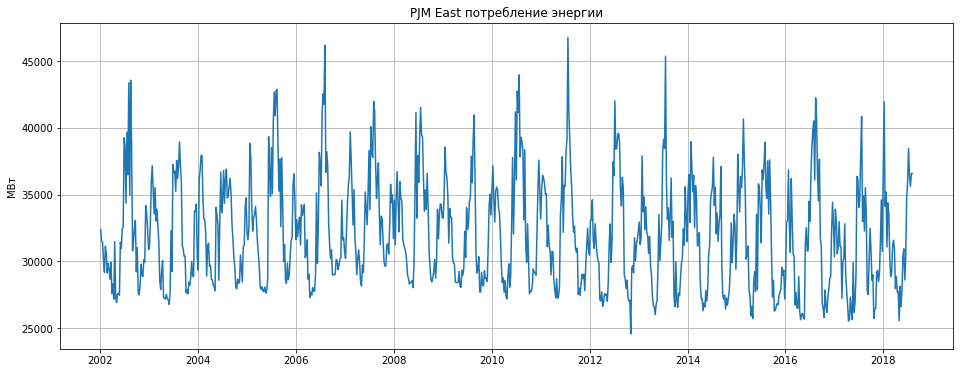

In [4]:
# Сделаем перерасчет ряда в недельные временные отрезки
data_w = data.resample('W').mean()
plt.figure(figsize =(16,6))
plt.plot(data_w.index, data_w['PJME_MW'])
plt.title('PJM East потребление энергии' )
plt.ylabel('МВт')
plt.show()

In [5]:
data_w.head(10)

,PJME_MW,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,hour,is_holiday,is_prev_holiday,is_next_holiday
Date,,,,,,,,,,,,
2002-01-06,32392.160839,2002.0,1.000000,3.517483,1.0,3.517483,1.0,3.517483,11.58042,0.160839,0.000000,0.167832
2002-01-13,31487.386905,2002.0,1.000000,10.000000,1.0,10.000000,2.0,3.000000,11.50000,0.000000,0.000000,0.000000
2002-01-20,31452.880952,2002.0,1.000000,17.000000,1.0,17.000000,3.0,3.000000,11.50000,0.000000,0.142857,0.000000
2002-01-27,30141.529762,2002.0,1.000000,24.000000,1.0,24.000000,4.0,3.000000,11.50000,0.142857,0.000000,0.142857
2002-02-03,29196.488095,2002.0,1.428571,17.714286,1.0,31.000000,5.0,3.000000,11.50000,0.000000,0.000000,0.000000
2002-02-10,31150.517857,2002.0,2.000000,7.000000,1.0,38.000000,6.0,3.000000,11.50000,0.000000,0.000000,0.000000
2002-02-17,30616.565476,2002.0,2.000000,14.000000,1.0,45.000000,7.0,3.000000,11.50000,0.000000,0.142857,0.000000
2002-02-24,29144.130952,2002.0,2.000000,21.000000,1.0,52.000000,8.0,3.000000,11.50000,0.142857,0.000000,0.142857
2002-03-03,29869.011905,2002.0,2.428571,16.000000,1.0,59.000000,9.0,3.000000,11.50000,0.000000,0.000000,0.000000


In [6]:
data = data_w.iloc[:,:1]

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
PJME_MW,866.0,32081.930877,3982.384374,24577.173653,28791.333333,31424.488095,34817.644345,46761.494048


### Генерация признаков

In [8]:
data['date'] = data.index.values
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['quarter'] = data['date'].dt.quarter
data['weekofyear'] = data['date'].dt.weekofyear

In [9]:
data.head()

,PJME_MW,date,year,month,quarter,weekofyear
Date,,,,,,
2002-01-06,32392.160839,2002-01-06,2002,1,1,1
2002-01-13,31487.386905,2002-01-13,2002,1,1,2
2002-01-20,31452.880952,2002-01-20,2002,1,1,3
2002-01-27,30141.529762,2002-01-27,2002,1,1,4
2002-02-03,29196.488095,2002-02-03,2002,2,1,5


In [10]:
data.drop('date', axis=1, inplace=True)

In [11]:
from sklearn.preprocessing import StandardScaler

scl = StandardScaler()
X = data.iloc[:,:-1].values
XS = scl.fit_transform(X)

In [12]:
# Добавим признаки на основе компонетного анализа. PCA - метод главных компонент.

In [13]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, svd_solver='full')
XPCA = pca.fit_transform(XS[:,1:])
XPCA.shape

(866, 2)

In [14]:
data['pca1'] = XPCA[:,0]
data['pca2'] = XPCA[:,1]

In [15]:
# Добавим первые разности
first_diff = np.array(data.iloc[1:,0].values - data.iloc[:-1,0].values).astype('float32') 
data['diff1'] = 0
data['diff1'] =  data['diff1'].astype('float') 
data['diff1'].values[1:] = first_diff

In [16]:
# Добавим скользящее среднее с глубиной 4 недели.
data['4W'] = data['PJME_MW'].rolling(window=4).mean()

In [17]:
# Добавим экспонентциальную среднюю
def exponential_smoothing(series, alpha):
    result = [series[0]] 
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return result

data['exp_05'] = exponential_smoothing(data['PJME_MW'], 0.05)
data['exp_08'] = exponential_smoothing(data['PJME_MW'], 0.08)

In [18]:
data.head()

,PJME_MW,year,month,quarter,weekofyear,pca1,pca2,diff1,4W,exp_05,exp_08
Date,,,,,,,,,,,
2002-01-06,32392.160839,2002,1,1,1,-1.960384,1.746472,0.000000,NaN,32392.160839,32392.160839
2002-01-13,31487.386905,2002,1,1,2,-1.960384,1.746472,-904.773926,NaN,32346.922142,32319.778924
2002-01-20,31452.880952,2002,1,1,3,-1.960384,1.746472,-34.505951,NaN,32302.220083,32250.427087
2002-01-27,30141.529762,2002,1,1,4,-1.960384,1.746472,-1311.351196,31368.489615,32194.185567,32081.715301
2002-02-03,29196.488095,2002,2,1,5,-1.754828,1.735158,-945.041687,30569.571429,32044.300693,31850.897124


In [19]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
PJME_MW,866.0,3.208193e+04,3982.384374,24577.173653,28791.333333,31424.488095,34817.644345,46761.494048
year,866.0,2.009812e+03,4.797678,2002.000000,2006.000000,2010.000000,2014.000000,2018.000000
month,866.0,6.434180e+00,3.436416,1.000000,3.000000,6.000000,9.000000,12.000000
quarter,866.0,2.481524e+00,1.114385,1.000000,1.000000,2.000000,3.000000,4.000000
weekofyear,866.0,2.621594e+01,15.027629,1.000000,13.000000,26.000000,39.000000,53.000000
pca1,866.0,7.345933e-17,1.405986,-2.156050,-1.549273,-0.311103,0.939295,2.201923
pca2,866.0,-8.843324e-16,0.998901,-1.742972,-0.847999,0.007407,0.887216,1.746472
diff1,866.0,4.822913e+00,2570.359912,-9574.619141,-1464.360077,-45.869049,1279.193420,10708.190430
4W,863.0,3.207466e+04,3543.893141,25890.098214,29063.004803,31840.039435,34606.133929,42876.346726
exp_05,866.0,3.209036e+04,1114.723910,29186.921318,31326.308317,32037.296014,32854.189870,34812.202257


In [20]:
data.shape

(866, 11)

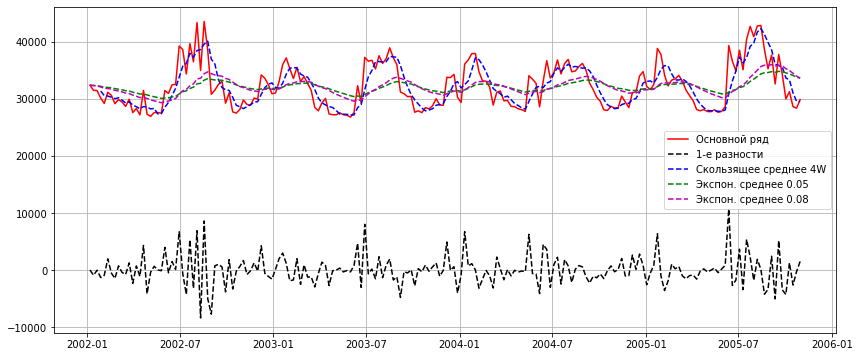

In [21]:
matplotlib.rcParams.update({'figure.figsize': (14,6)})
N100=200
plt.plot(data.index[:N100],data['PJME_MW'][:N100],'r',label ='Основной ряд')
plt.plot(data.index[:N100],data['diff1'][:N100],'--k',label ='1-е разности')
plt.plot(data.index[:N100],data['4W'][:N100],'--b',label ='Скользящее среднее 4W')
plt.plot(data.index[:N100],data['exp_05'][:N100],'--g',label ='Экспон. среднее 0.05')
plt.plot(data.index[:N100],data['exp_08'][:N100],'--m',label ='Экспон. среднее 0.08')
plt.legend()
plt.show()

In [22]:
# Добавим истории длиной p в признаках автокорреляции
p = 4
for i in range(p):
    data['t'+ str(p-i)]=0
    data['t'+ str(p-i)].values[p:] = data['PJME_MW'].values[i:-(p)+i]

In [23]:
data.tail(10).T

Date,2018-06-03,2018-06-10,2018-06-17,2018-06-24,2018-07-01,2018-07-08,2018-07-15,2018-07-22,2018-07-29,2018-08-05
PJME_MW,30945.601190,28615.154762,30316.940476,34711.648810,35911.839286,38459.982143,36420.035714,35612.095238,36581.821429,36568.804124
year,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000
month,6.000000,6.000000,6.000000,6.000000,7.000000,7.000000,7.000000,7.000000,7.000000,8.000000
quarter,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
weekofyear,22.000000,23.000000,24.000000,25.000000,26.000000,27.000000,28.000000,29.000000,30.000000,31.000000
pca1,-0.494540,-0.494540,-0.494540,-0.494540,0.344747,0.344747,0.344747,0.344747,0.344747,0.550303
pca2,-1.680777,-1.680777,-1.680777,-1.680777,-1.731658,-1.731658,-1.731658,-1.731658,-1.731658,-1.742972
diff1,563.208313,-2330.446533,1701.785767,4394.708496,1200.190430,2548.142822,-2039.946411,-807.940491,969.726196,-13.017304
4W,28949.561012,29449.322917,30065.022321,31147.336310,32388.895833,34850.102679,36375.876488,36600.988095,36768.483631,36295.689126
exp_05,30201.478295,30122.162119,30131.901037,30360.888425,30638.435968,31029.513277,31299.039399,31514.692191,31768.048653,32008.086426


In [24]:
# Аналогично добавляем первые разности на глубину p
p = 4
for i in range(p):
    data['d'+ str(p-i)]=0
    data['d'+ str(p-i)].values[p:] = data['diff1'].values[i:-(p)+i]

### Выделение существенных признаков

Запишем итоговую систему признаков и проведем ее анализ.
Горизонт прогнозирования h = 1, тогда  𝑡𝑎𝑟𝑔𝑒𝑡=𝑦(𝑡+ℎ)=𝑦(𝑡+1)

In [25]:
scl_target=StandardScaler() 
p = 4
h = 1
target = data['PJME_MW'].values[h+p:].reshape((data.shape[0]-h-p,1))
y = scl_target.fit_transform(target)
y.shape

(861, 1)

In [26]:
# Входной набор признаков берем из нашей таблицы.
scl_x = StandardScaler() 
X = data.iloc[p:-h,:].values
X = scl_x.fit_transform(X.astype('float64'))
X.shape

(861, 19)

In [27]:
data.iloc[p:-h,:]

,PJME_MW,year,month,quarter,weekofyear,pca1,pca2,diff1,4W,exp_05,exp_08,t4,t3,t2,t1,d4,d3,d2,d1
Date,,,,,,,,,,,,,,,,,,,
2002-02-03,29196.488095,2002,2,1,5,-1.754828,1.735158,-945.041687,30569.571429,32044.300693,31850.897124,32392,31487,31452,30141,0,-904,-34,-1311
2002-02-10,31150.517857,2002,2,1,6,-1.754828,1.735158,1954.029785,30485.354167,31999.611551,31794.866783,31487,31452,30141,29196,-904,-34,-1311,-945
2002-02-17,30616.565476,2002,2,1,7,-1.754828,1.735158,-533.952393,30276.275298,31930.459248,31700.602678,31452,30141,29196,31150,-34,-1311,-945,1954
2002-02-24,29144.130952,2002,2,1,8,-1.754828,1.735158,-1472.434570,30026.925595,31791.142833,31496.084940,30141,29196,31150,30616,-1311,-945,1954,-533
2002-03-03,29869.011905,2002,3,1,9,-1.549273,1.723843,724.880981,30195.056548,31695.036287,31365.919097,29196,31150,30616,29144,-945,1954,-533,-1472
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-07-01,35911.839286,2018,7,3,26,0.344747,-1.731658,1200.190430,32388.895833,30638.435968,30594.670754,30945,28615,30316,34711,563,-2330,1701,4394
2018-07-08,38459.982143,2018,7,3,27,0.344747,-1.731658,2548.142822,34850.102679,31029.513277,31223.895665,28615,30316,34711,35911,-2330,1701,4394,1200
2018-07-15,36420.035714,2018,7,3,28,0.344747,-1.731658,-2039.946411,36375.876488,31299.039399,31639.586869,30316,34711,35911,38459,1701,4394,1200,2548


Размеры выборок по строкам совпали. Мы взяли на h строк меньше для Х и на h значений позднее по target.

In [28]:
from sklearn.feature_selection import SelectKBest, SelectPercentile
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import f_regression, mutual_info_regression

f_test, _ = f_regression(X, y.ravel())
f_test /= np.max(f_test)
for i in range(X.shape[1]):
    print("F-test={:.2f},  I={}".format(f_test[i],i))

F-test=1.00,  I=0
F-test=0.01,  I=1
F-test=0.00,  I=2
F-test=0.00,  I=3
F-test=0.00,  I=4
F-test=0.00,  I=5
F-test=0.01,  I=6
F-test=0.02,  I=7
F-test=0.60,  I=8
F-test=0.02,  I=9
F-test=0.05,  I=10
F-test=0.07,  I=11
F-test=0.16,  I=12
F-test=0.31,  I=13
F-test=0.53,  I=14
F-test=0.04,  I=15
F-test=0.03,  I=16
F-test=0.02,  I=17
F-test=0.02,  I=18


Проверка через F-test показывает, что есть корреляционная связь с предшествующим значением ряда и признаками 8, 12, 13, 14

In [29]:
sfk = SelectKBest(f_regression, k=5)
X_new1 = sfk.fit_transform(X, y.ravel())
X_new1.shape

(861, 5)

In [30]:
column_names = data.columns[sfk.get_support()]
column_names

Index(['PJME_MW', '4W', 't3', 't2', 't1'], dtype='object')

In [31]:
# Проверим результат оценки признаков по процентному отбору
sfp = SelectPercentile(f_regression, percentile=25)
X_new2 = sfp.fit_transform(X, y.ravel())
X_new2.shape

(861, 5)

In [32]:
column_namesp = data.columns[sfp.get_support()]
column_namesp

Index(['PJME_MW', '4W', 't3', 't2', 't1'], dtype='object')

In [33]:
# Применим выделение признаков через построение модели. Возьмем как оценшик GradientBoostingRegressor
#from sklearn.ensemble import GradientBoostingRegressor
import lightgbm as lgb

gr_model = lgb.LGBMRegressor(max_depth=5, random_state=37, n_estimators=100).fit(X, y.ravel())
sfm = SelectFromModel(gr_model,  max_features = 5)
sfm.fit(X, y.ravel())
X_new3 = sfm.transform(X)
X_new3.shape

(861, 5)

In [34]:
list_param_k = np.where(sfk.get_support())[0]
list_param_p = np.where(sfp.get_support())[0]
list_param_m = np.where(sfm.get_support())[0]

print('Номера k лучших признаков            : ',list_param_k)
print('Номера лучших признаков по % форме   : ',list_param_p)
print('Номера признаков для выбора по модели: ',list_param_m)

Номера k лучших признаков            :  [ 0  8 12 13 14]
Номера лучших признаков по % форме   :  [ 0  8 12 13 14]
Номера признаков для выбора по модели:  [ 0  4  5  9 12]


In [35]:
list_par = [0, 4, 5, 8, 9, 12, 13, 14]
X_new = X[:,list_par]
data.columns[list_par]

Index(['PJME_MW', 'weekofyear', 'pca1', '4W', 'exp_05', 't3', 't2', 't1'], dtype='object')

### Разделение данных на тестовые и тренировочные

In [36]:
def split_data(data, split_date):
    return data.loc[data.index.get_level_values('Date') <= split_date].copy(), \
           data.loc[data.index.get_level_values('Date') >  split_date].copy()

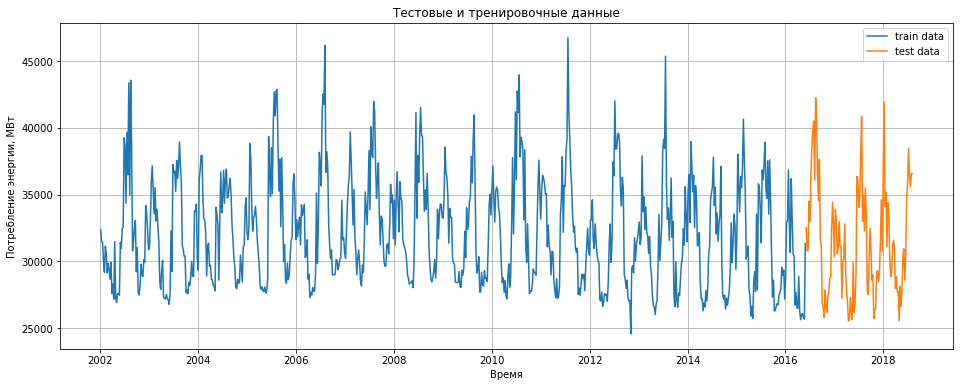

In [37]:
train, test = split_data(data, '2016-05-29')
plt.figure( figsize=(16, 6))
plt.xlabel('Время')
plt.ylabel('Потребление энергии, МВт')
plt.plot(train.index.get_level_values('Date'),train['PJME_MW'], label='train data' )
plt.plot(test.index.get_level_values('Date'),test['PJME_MW'],   label='test data')
plt.title( 'Тестовые и тренировочные данные' )
plt.legend()
plt.show()

In [38]:
X_train1 = X_new[:train.shape[0],:]
y_train1 = y[:train.shape[0],0]
X_test1  = X_new[train.shape[0]:,:]
y_test1  = y[train.shape[0]:,0]

In [39]:
X_train1.shape

(752, 8)

In [40]:
len(y_train1)

752

### Построение модели

In [41]:
model_g = lgb.LGBMRegressor(max_depth=4, random_state=37, n_estimators=55)

In [42]:
model_g.fit(X_train1, y_train1)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=4,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=55, n_jobs=-1, num_leaves=31, objective=None,
              random_state=37, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [43]:
y_test_pred_g = model_g.predict(X_test1)

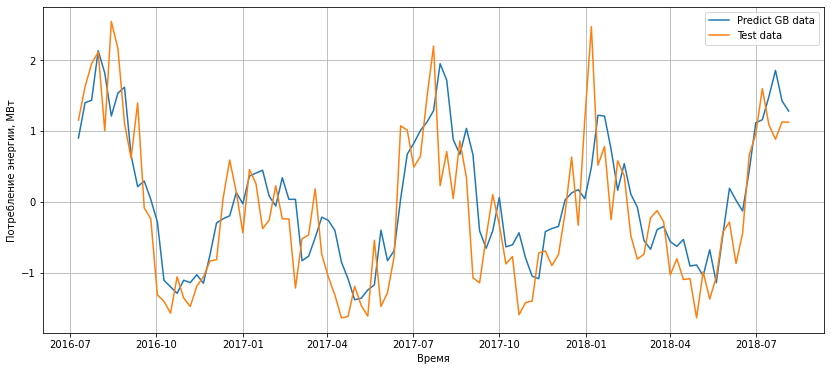

In [44]:
#plt.figure(figsize=(16, 6))
plt.xlabel('Время')
plt.ylabel('Потребление энергии, МВт')
plt.plot(test.index[h+p:],y_test_pred_g, label='Predict GB data' )
plt.plot(test.index[h+p:],y_test1, label='Test data')
plt.legend()
plt.show()

### Оценка  модели   
- Средне-квадратичное отклонение
- Средняя абсолютная ошибка
- Коэфиициент детерминации 

In [45]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [46]:
er_s = mean_squared_error (y_true=y_test1, y_pred=y_test_pred_g) 
er_a = mean_absolute_error(y_true=y_test1, y_pred=y_test_pred_g) 
er_r2 = r2_score(y_true=y_test1, y_pred=y_test_pred_g)
print('Ошибка mse :  ', er_s,'\nОшибка mae :  ', er_a,'\nОценка R2  :  ', er_r2)

Ошибка mse :   0.3954655445715053 
Ошибка mae :   0.5010595755145105 
Оценка R2  :   0.6379889687018048


In [47]:
# Абсолютная процентная ошибка (MAPE).
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

er_g = mean_absolute_percentage_error(y_true = scl_target.inverse_transform(y_test1),
                                      y_pred = scl_target.inverse_transform(y_test_pred_g))
print(f'Ошибка LGBMRegressor MAPE: {er_g:.4f}%')

Ошибка LGBMRegressor MAPE: 6.4024%


### Сохранение модели

In [48]:
import pickle

filename = 'model.sav'
pickle.dump(model_g, open(filename, 'wb'))

filename = 'scaler_y.sav'
pickle.dump(scl_target, open(filename, 'wb'))

filename = 'scaler_x.sav'
pickle.dump(scl_x, open(filename, 'wb'))

### Использование модели для предсказания $n * h$ моментов времени

In [49]:
train.shape[0]

752

In [50]:
h = 4
train, test = split_data(data, '2016-05-29')

X_train = train.iloc[:-h,:]
y_train = train[data.columns[0]].values[h:]
X_test  = test.iloc[:-h,:]
y_test  = test[data.columns[0]].values[h:]

In [51]:
X_train.shape

(748, 19)

In [52]:
len(y_train)

748

In [53]:
model_g.fit(X_train, y_train)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=4,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=55, n_jobs=-1, num_leaves=31, objective=None,
              random_state=37, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [54]:
y_test_pred = model_g.predict(X_test)

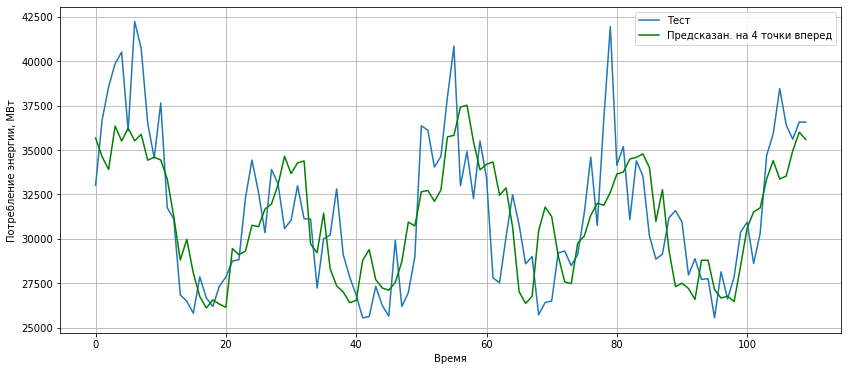

In [55]:
plt.xlabel('Время')
plt.ylabel('Потребление энергии, МВт')
plt.plot(y_test, label='Тест')
plt.plot(y_test_pred, c='g', label='Предсказан. на 4 точки вперед')
plt.legend()
plt.show()

In [56]:
er_r2 = r2_score(y_true=y_test, y_pred=y_test_pred)
print('Оценка R2  :  ', er_r2)

Оценка R2  :   0.5175134908486809


#### Примените авторекурсию и сравните результат в 4-й точке путем прямого моделирования и путем рекурсивного моделирования на длине выборки из 4-х точек.

In [57]:
model_g = lgb.LGBMRegressor(max_depth=4, random_state=37, n_estimators=55)
model_g.fit(X_train1, y_train1)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=4,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=55, n_jobs=-1, num_leaves=31, objective=None,
              random_state=37, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [58]:
X_test1.shape

(109, 8)

In [59]:
len(y_test_pred_g)

109

In [60]:
X_test_100 = X_test1.copy()
y_test_100 = y_test_pred_g.copy()
# 4 дня прогноза
N10 = 4
for i in range(N10):
    # Предсказание y_test_100
    y_test_100[i] = model_g.predict(X_test_100[i,:].reshape((1,8)))
    
    # Продолжить прогноз на следующие точки ряда.  Заполняем вектор для прогноза следующей точки
    X_test_100[i+1,0] = y_test_100[i]
    #================================
    #X_test_100[i+1,5] = X_test_100[i+1,0]*(1-0.07) + 0.07 * X_test_100[i,5]
    #X_test_100[i+1,4] = X_test_100[i+1,0]*(1-0.08) + 0.08 * X_test_100[i,4] 

In [62]:
er_g = mean_absolute_percentage_error(y_true = scl_target.inverse_transform( y_test1[:N10]),
                                      y_pred = scl_target.inverse_transform( y_test_100[:N10]))
print(f'Ошибка LGBMRegressor MAPE (4): {er_g:.4f}%')

Ошибка LGBMRegressor MAPE (4): 3.2886%


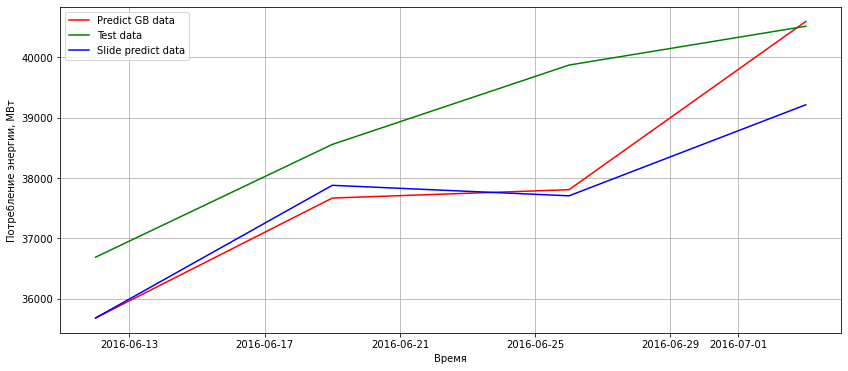

In [63]:
plt.xlabel('Время')
plt.ylabel('Потребление энергии, МВт')
plt.plot(test.index[1:N10+1], scl_target.inverse_transform(y_test_pred_g[:N10]), 'r',label='Predict GB data' )
plt.plot(test.index[1:N10+1], scl_target.inverse_transform(y_test1[:N10]), 'g', label='Test data')
plt.plot(test.index[1:N10+1], scl_target.inverse_transform(y_test_100[:N10]), 'b',label='Slide predict data')
plt.legend()
plt.show()